In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

In [14]:
import pandas as pd

df = pd.read_csv('../data/spy.csv', index_col='date')

In [68]:
df['y'] = df.close.shift(-1)
df = df.dropna()

d:\stonks\stonks\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df

,close,high,low,open,y
date,,,,,
2015-01-02 00:00:00+00:00,205.43,206.8800,204.1800,206.3800,201.72
2015-01-05 00:00:00+00:00,201.72,204.3700,201.3500,204.1700,199.82
2015-01-06 00:00:00+00:00,199.82,202.7200,198.8600,202.0900,202.31
2015-01-07 00:00:00+00:00,202.31,202.7200,200.8800,201.4200,205.90
2015-01-08 00:00:00+00:00,205.90,206.1600,203.9900,204.0100,204.25
...,...,...,...,...,...
2019-12-18 00:00:00+00:00,319.59,320.2500,319.5300,320.0000,320.90
2019-12-19 00:00:00+00:00,320.90,320.9800,319.5246,319.7999,320.73
2019-12-20 00:00:00+00:00,320.73,321.9742,319.3873,320.4600,321.22


In [70]:
pipe = make_pipeline(StandardScaler(), SGDRegressor(random_state=42))

In [71]:
train = df[:1000]
test = df[1000:]

In [72]:
pipe.fit(train[['close', 'open', 'high', 'low']], train['y'])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=42, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [73]:
pipe.score(test[['close', 'open', 'high', 'low']], test['y'])

0.9745363780146175

In [79]:
preds = pd.Series(pipe.predict(test[['close', 'open', 'high', 'low']]), name='preds')

In [75]:
import matplotlib.pyplot as plt


plt.style.use('dark_background')


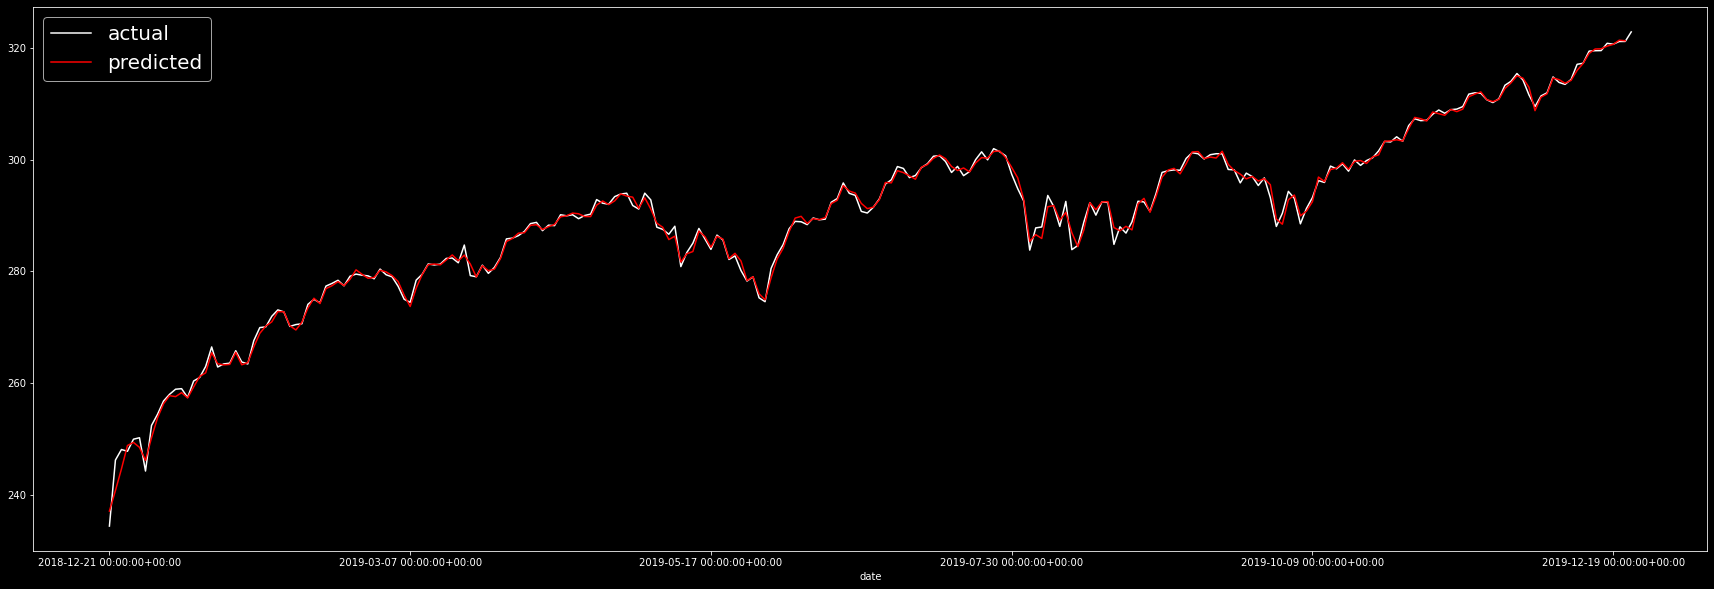

In [88]:
test['y'].plot(figsize=(30, 10), c='white', label='actual')
preds.shift(-1).plot(c='red', label='predicted')
plt.legend(fontsize=20)

In [78]:
df

,close,high,low,open,y
date,,,,,
2015-01-02 00:00:00+00:00,205.43,206.8800,204.1800,206.3800,201.72
2015-01-05 00:00:00+00:00,201.72,204.3700,201.3500,204.1700,199.82
2015-01-06 00:00:00+00:00,199.82,202.7200,198.8600,202.0900,202.31
2015-01-07 00:00:00+00:00,202.31,202.7200,200.8800,201.4200,205.90
2015-01-08 00:00:00+00:00,205.90,206.1600,203.9900,204.0100,204.25
...,...,...,...,...,...
2019-12-18 00:00:00+00:00,319.59,320.2500,319.5300,320.0000,320.90
2019-12-19 00:00:00+00:00,320.90,320.9800,319.5246,319.7999,320.73
2019-12-20 00:00:00+00:00,320.73,321.9742,319.3873,320.4600,321.22
